MAGIC_MachineLearning_GI

## DATASET COMPLET LFP+PCA

In [2]:
#loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OutputDir = "C:/LustreSync/03_CartesTF/Stats_GI"
MY_PatPCA = OutputDir + "/Barplots/AS_allpat.csv"
MY_APA = pd.read_csv(MY_PatPCA, sep = "\t")
MY_APA = pd.DataFrame(MY_APA)
MY_APA.head()

C:\Users\mathieu.yeche\AppData\Local\Temp\ipykernel_14084\2650619769.py:9: DtypeWarning: Columns (10,11,123) have mixed types. Specify dtype option on import or set low_memory=False.
  MY_APA = pd.read_csv(MY_PatPCA, sep = "\t")


,Protocol,Patient,Medication,Task,Condition,quality,isValid,isFOG,nTrial,Channel,...,dimension1,dimension2,dimension3,FOG,dU3,dFogQ,U3,dimensions5,dimension23,dimension54
0,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,Meta_FOG_2,-32,NaN,39.0,4.211546,14.495918,-4.801646
1,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,Meta_FOG_2,-32,NaN,39.0,4.211546,14.495918,-4.801646
2,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,Meta_FOG_2,-32,NaN,39.0,4.211546,14.495918,-4.801646
3,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,Meta_FOG_2,-32,NaN,39.0,4.211546,14.495918,-4.801646
4,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,Meta_FOG_2,-32,NaN,39.0,4.211546,14.495918,-4.801646


Preprocessing

In [4]:
MY_APA['FOG'] = MY_APA['FOG'].str.extract('(\d+)')
MY_APA.dropna(subset=['FOG'], inplace=True)

MY_APA['FOG'] = MY_APA['FOG'].astype(int)

MY_APA.loc[MY_APA['FOG'] == 0, 'FOG'] = 0
MY_APA.loc[MY_APA['FOG'] == 1, 'FOG'] = 0
MY_APA.loc[MY_APA['FOG'] == 2, 'FOG'] = 1

MY_APA.head()



,Protocol,Patient,Medication,Task,Condition,quality,isValid,isFOG,nTrial,Channel,...,dimension1,dimension2,dimension3,FOG,dU3,dFogQ,U3,dimensions5,dimension23,dimension54
0,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,1,-32,NaN,39.0,4.211546,14.495918,-4.801646
1,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,1,-32,NaN,39.0,4.211546,14.495918,-4.801646
2,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,1,-32,NaN,39.0,4.211546,14.495918,-4.801646
3,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,1,-32,NaN,39.0,4.211546,14.495918,-4.801646
4,GBMOV,ParkPitie_2020_02_13_DEj,OFF,GOc,APA,1,1,1.0,1,23D,...,-1.890892,-0.588245,-1.129258,1,-32,NaN,39.0,4.211546,14.495918,-4.801646


In [132]:
from sklearn.model_selection import train_test_split

X   = MY_APA.drop('FOG', axis = 1)
X   = X.iloc[:, [12] + list(range(17, 129))]
X   = X.drop('dFogQ', axis = 1)
y   = MY_APA['FOG']

Xsave = X
ysave = y

X.head()

,Freq,x_1_25,x_1_2207,x_1_1914,x_1_1621,x_1_1328,x_1_1035,x_1_0742,x_1_0449,x_1_0156,...,x1_709,x1_7383,dimension1,dimension2,dimension3,dU3,U3,dimensions5,dimension23,dimension54
0,1,2.028947,1.857961,1.621684,1.512965,1.342745,0.972073,0.878223,0.925173,0.656665,...,49.529114,51.164269,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
1,2,2.226381,1.783435,1.406714,1.356133,1.175728,0.907168,0.854447,0.906844,0.643277,...,43.067179,43.597626,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
2,3,2.349140,1.717398,1.280028,1.295579,1.151130,0.914527,0.879746,0.788009,0.630767,...,32.957521,36.911392,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
3,4,2.289056,1.672258,1.182795,1.422193,1.384736,1.147813,1.017301,0.986117,0.630557,...,35.362696,37.326827,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
4,5,2.168728,1.898753,1.564917,1.577260,1.527827,1.468649,1.019716,0.726647,0.645378,...,38.900646,37.292350,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646


for i in range(0, 30):
    print(X.iloc[100*i, 104])


In [133]:
nonTF = X.iloc[:, [0] + list(range(104, 112))]
nonTF = nonTF[nonTF.index % 100 == 0]
nonTF = nonTF.drop('Freq', axis = 1)
nonTF   # Quelques repetitions car hemisphere * Channel


,dimension1,dimension2,dimension3,dU3,U3,dimensions5,dimension23,dimension54
0,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
100,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
200,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
300,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
400,-1.890892,-0.588245,-1.129258,-32,39.0,4.211546,14.495918,-4.801646
...,...,...,...,...,...,...,...,...
881200,2.061250,-1.699647,0.064275,-28,2.0,1.138368,-2.546962,0.880026
881300,2.245589,-1.529661,-0.073830,-28,2.0,1.138368,-2.546962,0.880026
881400,2.245589,-1.529661,-0.073830,-28,2.0,1.138368,-2.546962,0.880026
881500,2.245589,-1.529661,-0.073830,-28,2.0,1.138368,-2.546962,0.880026


In [134]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
nonTFimp = pd.DataFrame(imp.fit_transform(nonTF))
nonTFimp.columns = nonTF.columns
print(nonTF.isna().sum().sum())
nonTF = nonTFimp
print(nonTF.isna().sum().sum())

288
0


In [135]:
import warnings
warnings.filterwarnings('ignore')

onlyTF = X.iloc[:, 0:104]
newDF  = pd.DataFrame()
for column in onlyTF:
    # Check if the column starts with 'X'
    if column.startswith('x'):
        # Loop over the unique frequencies in X
        for freq in X['Freq'].unique():
            new_column = f'{column}_{freq}'
            contenu = onlyTF.loc[X['Freq'] == freq, column]
            contenu = np.array(contenu)
            newDF[new_column] = contenu

warnings.filterwarnings('default')

newDF

,x_1_25_1,x_1_25_2,x_1_25_3,x_1_25_4,x_1_25_5,x_1_25_6,x_1_25_7,x_1_25_8,x_1_25_9,x_1_25_10,...,x1_7383_91,x1_7383_92,x1_7383_93,x1_7383_94,x1_7383_95,x1_7383_96,x1_7383_97,x1_7383_98,x1_7383_99,x1_7383_100
0,2.028947,2.226381,2.349140,2.289056,2.168728,2.371143,2.316408,1.966790,1.736728,2.332176,...,1.853349,1.541220,1.915106,1.506024,1.476271,1.476185,1.965400,1.992530,2.522075,2.844996
1,1.257119,1.223864,1.196468,1.234012,1.117803,0.998136,1.014051,1.133339,1.223077,0.754832,...,1.764602,1.480404,1.739033,1.347626,1.494908,1.597926,2.111537,1.788021,2.035976,1.932512
2,2.475495,2.485186,2.708368,2.654075,2.521738,3.410763,3.201252,2.430852,2.421849,2.675738,...,1.360619,1.138809,1.232279,1.048543,1.435538,1.243884,1.308090,1.303328,1.531757,1.476974
3,1.033823,1.062212,1.017722,1.036111,1.068375,1.035459,1.249216,1.601424,1.274648,1.897774,...,1.499013,1.865731,2.062278,2.073282,2.501343,3.539160,4.584012,2.711857,2.647020,2.105422
4,0.739519,0.713719,0.719520,0.753952,0.678257,0.564637,0.490082,0.290362,0.204889,0.329251,...,1.765465,1.982208,1.711842,1.776768,2.857638,3.891685,1.865790,3.576909,2.920716,2.599356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,2.649822,1.487233,1.388233,1.276780,0.975162,1.679019,1.098620,1.184348,1.048137,0.881068,...,0.812002,1.220971,1.540146,2.647180,3.115724,2.788012,1.946722,2.022123,1.626441,1.182403
8639,1.558135,1.311575,1.363650,1.217891,1.170836,1.993417,1.245942,3.453236,2.501173,2.922396,...,2.250781,2.123165,2.380218,2.277530,2.621068,2.993979,2.957125,2.849279,1.785458,1.151979
8640,0.828318,0.708471,0.824561,0.638811,0.565449,1.101752,0.707529,1.563477,1.401314,1.558139,...,1.657203,2.196432,1.577037,1.270972,1.043924,0.903956,1.010573,0.928801,0.784531,0.488764
8641,0.692438,0.762513,0.904099,0.851211,0.897992,0.916607,1.007460,1.018366,0.995942,1.032231,...,0.436577,0.331676,0.521524,1.071057,0.861725,1.347838,1.217660,1.657097,1.752663,2.708366


In [136]:
nonTF = nonTF.reset_index(drop = True)
newDF = newDF.reset_index(drop = True)
X = pd.concat([nonTF, newDF], axis = 1)
X

,dimension1,dimension2,dimension3,dU3,U3,dimensions5,dimension23,dimension54,x_1_25_1,x_1_25_2,...,x1_7383_91,x1_7383_92,x1_7383_93,x1_7383_94,x1_7383_95,x1_7383_96,x1_7383_97,x1_7383_98,x1_7383_99,x1_7383_100
0,-1.890892,-0.588245,-1.129258,-32.0,39.0,4.211546,14.495918,-4.801646,2.028947,2.226381,...,1.853349,1.541220,1.915106,1.506024,1.476271,1.476185,1.965400,1.992530,2.522075,2.844996
1,-1.890892,-0.588245,-1.129258,-32.0,39.0,4.211546,14.495918,-4.801646,1.257119,1.223864,...,1.764602,1.480404,1.739033,1.347626,1.494908,1.597926,2.111537,1.788021,2.035976,1.932512
2,-1.890892,-0.588245,-1.129258,-32.0,39.0,4.211546,14.495918,-4.801646,2.475495,2.485186,...,1.360619,1.138809,1.232279,1.048543,1.435538,1.243884,1.308090,1.303328,1.531757,1.476974
3,-1.890892,-0.588245,-1.129258,-32.0,39.0,4.211546,14.495918,-4.801646,1.033823,1.062212,...,1.499013,1.865731,2.062278,2.073282,2.501343,3.539160,4.584012,2.711857,2.647020,2.105422
4,-1.890892,-0.588245,-1.129258,-32.0,39.0,4.211546,14.495918,-4.801646,0.739519,0.713719,...,1.765465,1.982208,1.711842,1.776768,2.857638,3.891685,1.865790,3.576909,2.920716,2.599356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,2.061250,-1.699647,0.064275,-28.0,2.0,1.138368,-2.546962,0.880026,2.649822,1.487233,...,0.812002,1.220971,1.540146,2.647180,3.115724,2.788012,1.946722,2.022123,1.626441,1.182403
8639,2.245589,-1.529661,-0.073830,-28.0,2.0,1.138368,-2.546962,0.880026,1.558135,1.311575,...,2.250781,2.123165,2.380218,2.277530,2.621068,2.993979,2.957125,2.849279,1.785458,1.151979
8640,2.245589,-1.529661,-0.073830,-28.0,2.0,1.138368,-2.546962,0.880026,0.828318,0.708471,...,1.657203,2.196432,1.577037,1.270972,1.043924,0.903956,1.010573,0.928801,0.784531,0.488764
8641,2.245589,-1.529661,-0.073830,-28.0,2.0,1.138368,-2.546962,0.880026,0.692438,0.762513,...,0.436577,0.331676,0.521524,1.071057,0.861725,1.347838,1.217660,1.657097,1.752663,2.708366


In [137]:
y = y[y.index % 100 == 0]
print(y.isna().sum())
y

0


0         1
100       1
200       1
300       1
400       1
         ..
881200    0
881300    0
881400    0
881500    0
881600    0
Name: FOG, Length: 8643, dtype: int32

In [138]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [139]:
# Delete rows with NaN values
X.isna().sum(axis=1).sort_values(ascending=False).head(50)

NAs = X.isna().sum(axis=1) == 0
y = y[NAs]
X = X[NAs]

print(X.shape)
print(y.shape)

(8600, 10308)
(8600,)


In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

Oversampling

In [141]:
sklearn
print(Counter(y))
print(Counter(ytrain))

Counter({0: 8420, 1: 180})
Counter({0: 6735, 1: 145})


In [144]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
XtrainRS, ytrainRS = over.fit_resample(Xtrain, ytrain)
print(Counter(ytrainRS))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
XtrainRS, ytrainRS = under.fit_resample(XtrainRS, ytrainRS)
print(Counter(ytrainRS))

Counter({0: 6735, 1: 673})
Counter({0: 673, 1: 673})


In [145]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
print(Counter(ytest))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
Xtest, ytest = over.fit_resample(Xtest, ytest)
print(Counter(ytest))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
Xtest, ytest = under.fit_resample(Xtest, ytest)
print(Counter(ytest))

Counter({0: 168, 1: 168})


ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

SVM

SVC with linear kernel
Accuracy: 0.7886904761904762


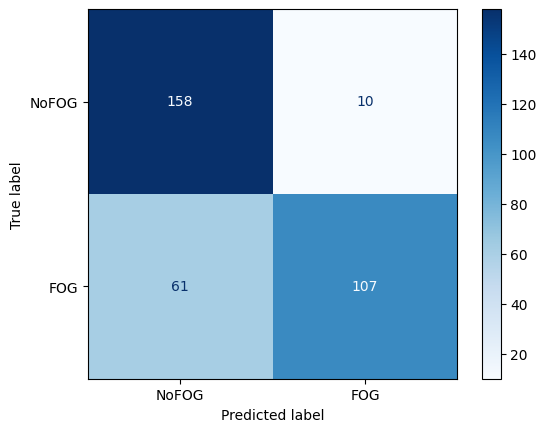

In [146]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter



print("SVC with linear kernel")
clf = svm.SVC(kernel="linear", C=C)
clf.fit(XtrainRS, ytrainRS)

ypred = clf.predict(Xtest)
print("Accuracy:",accuracy_score(ytest, ypred))

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

LinearSVC (linear kernel)


c:\Users\mathieu.yeche\Anaconda3\envs\GTP\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.7708333333333334


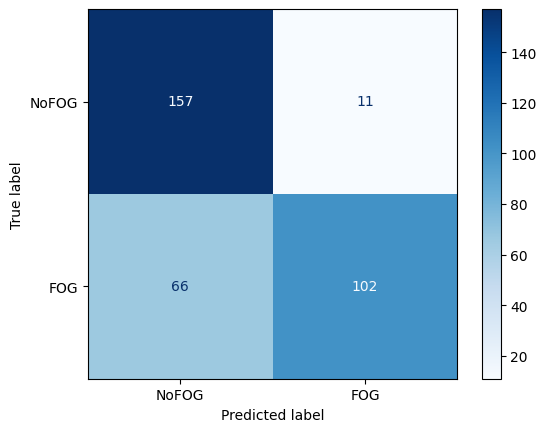

In [147]:
print("LinearSVC (linear kernel)")
clf = svm.LinearSVC(C=C, max_iter=10000, dual="auto")
clf.fit(XtrainRS, ytrainRS)

ypred = clf.predict(Xtest)
print("Accuracy:",accuracy_score(ytest, ypred))

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

In [ ]:
# Extract features


SVC with RBF kernel
Accuracy: 0.5


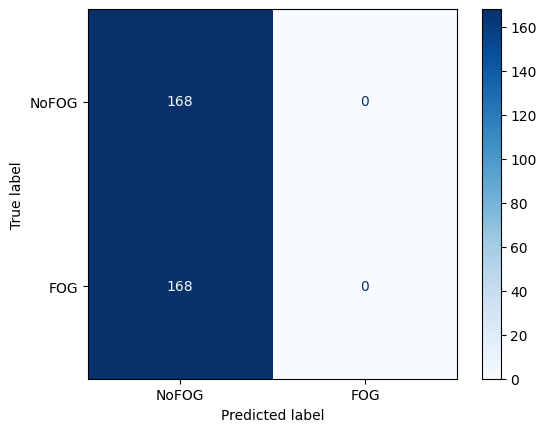

In [148]:
print("SVC with RBF kernel")
clf = svm.SVC(kernel="rbf", gamma=0.7, C=C)
clf.fit(XtrainRS, ytrainRS)

ypred = clf.predict(Xtest)
print("Accuracy:",accuracy_score(ytest, ypred))

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

SVC with polynomial (degree 3) kernel
Accuracy: 0.6517857142857143


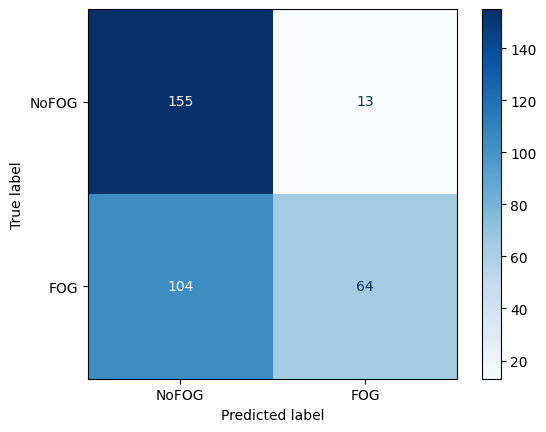

In [149]:
print("SVC with polynomial (degree 3) kernel")
clf = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
clf.fit(XtrainRS, ytrainRS)

ypred = clf.predict(Xtest)
print("Accuracy:",accuracy_score(ytest, ypred))

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

Random Forest (classic)

Accuracy: 0.6517857142857143


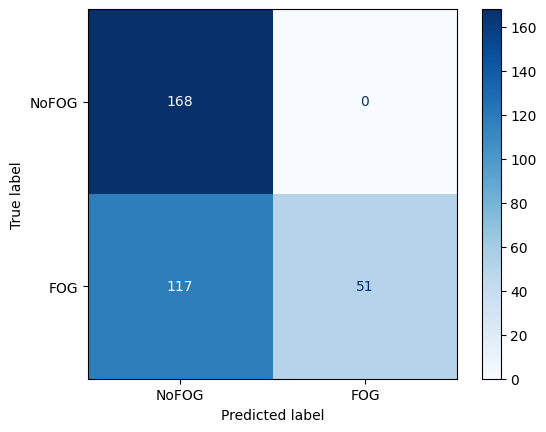

In [153]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=20,n_estimators=100000)

clf.fit(XtrainRS, ytrainRS)

ypred = clf.predict(Xtest)
print("Accuracy:",accuracy_score(ytest, ypred))

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# create a random forest classifier
rfc = RandomForestClassifier()

# create the grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(XtrainRS, ytrainRS)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Banlanced Random Forest

Accuracy: 0.8459302325581395


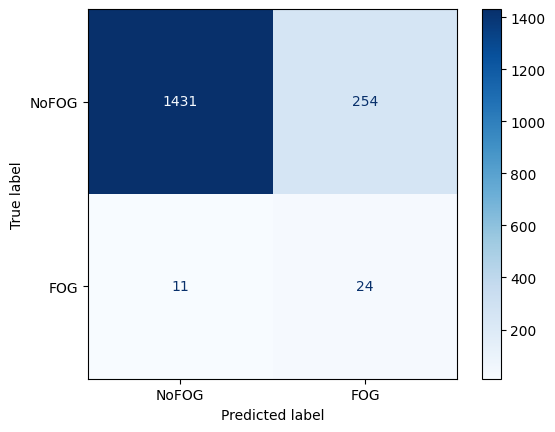

In [193]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=2, random_state=0,
    bootstrap=False)
clf.fit(Xtrain, ytrain)

print(clf.feature_importances_)

ypred = clf.predict(Xtest)
print("Accuracy:",accuracy_score(ytest, ypred))

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )


## Dataset = PCA input

In [3]:
TYPE_OF_MODEL = "PCA" # "PCA" or "AllVAR"

OutputDir = "Z:/03_CartesTF/Stats_GI"
if TYPE_OF_MODEL == "PCA":
    MY_PatPCA = OutputDir + "/Barplots/PCA_APA.csv"
    MY_APA = pd.read_csv(MY_PatPCA, sep = ";", decimal=".")
elif TYPE_OF_MODEL == "AllVAR":
    MY_PatPCA = OutputDir + "/Barplots/KinematicsForSVM.csv"
    MY_APA = pd.read_csv(MY_PatPCA, sep = ";", decimal=",")
MY_APA = pd.DataFrame(MY_APA)

if TYPE_OF_MODEL == "AllVAR":
    MY_APA = MY_APA.drop('Unnamed: 0', axis = 1)
    MY_APA = MY_APA.rename(columns = {'Meta_FOG':'FOG'})
elif TYPE_OF_MODEL == "PCA":
    MY_APA['FOG'] = MY_APA['FOG'] - 1
    
MY_APA

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,FOG
0,-6.125485,2.159880,2.069394,2.027372,0.319642,0.276764,-0.172350,-0.043007,0
1,-5.402702,3.681754,5.847895,3.236177,0.092661,-1.572044,0.773041,-1.273013,0
2,-5.099971,6.549365,3.150610,2.900871,0.530759,-0.760592,0.002296,-0.922009,0
3,-5.091700,6.599767,6.484846,3.364392,0.528063,-2.215511,0.008510,-2.021331,0
4,-5.482727,6.329378,8.166540,3.760422,1.041224,-2.557640,0.660114,-2.038117,0
...,...,...,...,...,...,...,...,...,...
2628,0.798634,-0.470181,-0.276779,0.585899,-0.538275,0.693504,0.438828,0.144707,0
2629,3.175912,-1.715768,-0.658792,1.172060,-0.726083,0.179650,0.203360,0.061625,0
2630,1.890663,-1.185343,-0.466813,0.861000,-0.583231,0.365000,0.447453,-0.134105,0
2631,2.189549,-0.947224,-0.308771,1.034645,-0.697162,0.426530,0.656828,-0.274802,0


In [4]:
#Rename columns
MY_APA.dropna(subset=['FOG'], inplace=True)

MY_APA['FOG'] = MY_APA['FOG'].astype(int)

MY_APA.loc[MY_APA['FOG'] == 0, 'FOG'] = 0
MY_APA.loc[MY_APA['FOG'] == 1, 'FOG'] = 0
MY_APA.loc[MY_APA['FOG'] == 2, 'FOG'] = 1

In [5]:
# Drop ON trials
if TYPE_OF_MODEL == "AllVAR":
    MY_APA = MY_APA[MY_APA['Condition'] == 'OFF']
    MY_APA.head()

In [7]:
import seaborn as sns

if TYPE_OF_MODEL == "AllVAR":
    fig, sub = plt.subplots(4, 5)
    fig.set_size_inches(30, 30)

    for column, ax in zip(MY_APA.columns[5:25], sub.flatten()):
        if column != 'FOG':
            sns.violinplot(x='FOG', y=column, data=MY_APA, ax=ax)
            ax.set_title(column)
            sns.stripplot(x='FOG', y=column, data=MY_APA, ax=ax, color="black", alpha=0.15)



In [6]:
X   = MY_APA.drop('FOG', axis = 1)
if TYPE_OF_MODEL == "AllVAR":
    X   = X.iloc[:, list(range(5, 25))]
y   = MY_APA['FOG']

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.2)
# fit and apply the transform
XRS, yRS = over.fit_resample(X, y)
print(Counter(yRS))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
XRS, yRS = under.fit_resample(XRS, yRS)
print(Counter(yRS))

Counter({0: 2529, 1: 104})
Counter({0: 2529, 1: 505})
Counter({0: 505, 1: 505})


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
print(Counter(y))
print(Counter(ytrain))
print(Counter(ytest))

Counter({0: 2529, 1: 104})
Counter({0: 2016, 1: 90})
Counter({0: 513, 1: 14})


In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.2)
# fit and apply the transform
XtrainRS, ytrainRS = over.fit_resample(Xtrain, ytrain)
print(Counter(ytrainRS))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
XtrainRS, ytrainRS = under.fit_resample(XtrainRS, ytrainRS)
print(Counter(ytrainRS))


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
print(Counter(ytest))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.2)
# fit and apply the transform
XtestRS, ytestRS = over.fit_resample(Xtest, ytest)
print(Counter(yRS))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
XtestRS, ytestRS = under.fit_resample(XtestRS, ytestRS)
print(Counter(ytestRS))

Xtrain, Xtest, ytrain, ytest = XtrainRS, XtestRS, ytrainRS, ytestRS

Counter({0: 2529, 1: 104})
Counter({0: 2016, 1: 403})
Counter({0: 403, 1: 403})
Counter({0: 513, 1: 14})
Counter({0: 505, 1: 505})
Counter({0: 102, 1: 102})


Basic SVM

Accuracy: 0.8480392156862745


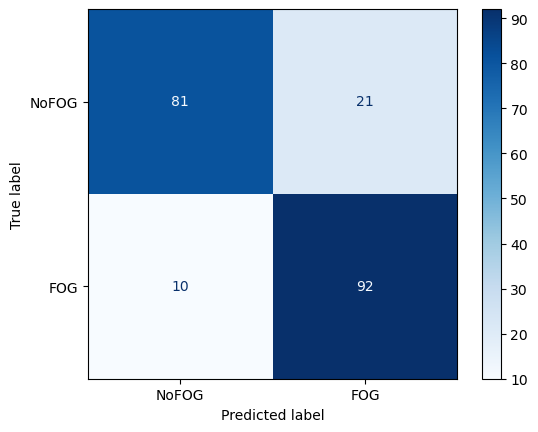

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# create an instance of SVM and fit our data
clf = SVC()
clf.fit(Xtrain, ytrain)

# predict the test set
ypred = clf.predict(Xtest)

# print the accuracy score
print("Accuracy:", accuracy_score(ytest, ypred))

# print the confusion matrix
confusion_matrix(ytest, ypred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )


In [17]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4]}

# create an instance of SVM
svc = SVC()

# create an instance of GridSearchCV and fit the data
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(Xtrain, ytrain)
grid_search.score(Xtest, ytest)

# print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)


Best hyperparameters: {'C': 1000, 'degree': 2, 'kernel': 'rbf'}
Accuracy: 0.951606471896327


In [18]:
grid_search.score(Xtest, ytest)

0.6372549019607843

Gridsearch optimized

Accuracy: 0.6372549019607843


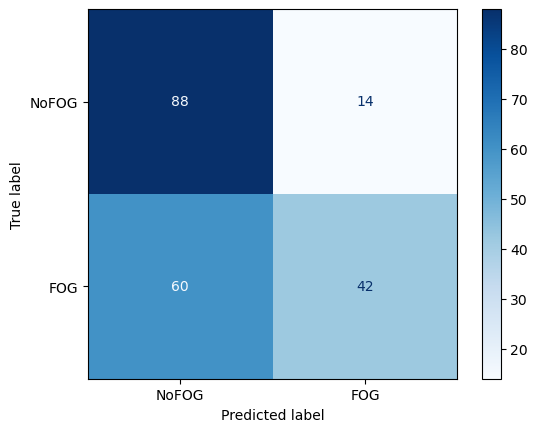

In [19]:
if TYPE_OF_MODEL == "PCA":
    C = 1000
    kernel = 'rbf'
    degree = 2

clf = SVC(C=C, kernel=kernel, degree=degree)
clf.fit(Xtrain, ytrain)

# predict the test set
ypred = clf.predict(Xtest)

# print the accuracy score
print("Accuracy:", accuracy_score(ytest, ypred))

# print the confusion matrix
confusion_matrix(ytest, ypred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

Leave one out cross validation

{'C': 1, 'degree': 2, 'kernel': 'rbf'}


SVC(C=1, degree=2)

In [22]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from imblearn.under_sampling import RandomUnderSampler

XRS, yRS = RandomUnderSampler(sampling_strategy='majority').fit_resample(X, y)
print(Counter(y))
print(Counter(yRS))

loo = LeaveOneOut()

clf = SVC(C=C, kernel=kernel, degree=degree)
scores = cross_val_score(clf, XRS, yRS, cv=loo, n_jobs=-1, scoring='neg_mean_squared_error')
print("last GridOptimized : root mean squared error (RMSE):", np.sqrt(np.mean(np.absolute(scores))), ' (Lower is better)')
clf = SVC()
scores = cross_val_score(clf, XRS, yRS, cv=loo, n_jobs=-1, scoring='neg_mean_squared_error')
print("Default SVM classifier : root mean squared error (RMSE):", np.sqrt(np.mean(np.absolute(scores))), ' (Lower is better)')

Counter({0: 2529, 1: 104})
Counter({0: 104, 1: 104})
last GridOptimized : root mean squared error (RMSE): 0.4702699715629801  (Lower is better)
Default SVM classifier : root mean squared error (RMSE): 0.4102063270711835  (Lower is better)


In [32]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

XRS, yRS = RandomUnderSampler(sampling_strategy='majority').fit_resample(X, y)
XRS = StandardScaler().fit_transform(XRS)

# define the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4]}

# create an instance of SVM
svc = SVC()

# create an instance of GridSearchCV and fit the data
loo = LeaveOneOut()
grid_search = GridSearchCV(svc, param_grid, cv=loo, n_jobs=-1)
grid_search.fit(XRS, yRS)
bestkernel = grid_search.best_params_['kernel']
bestdegree = grid_search.best_params_['degree']
scores = cross_val_score(SVC(**grid_search.best_params_), XRS, yRS, cv=loo, n_jobs=-1, scoring='neg_mean_squared_error')

# print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)
print("Root mean squared error (RMSE):", np.sqrt(np.mean(np.absolute(scores))), ' (Lower is better)')


Best hyperparameters: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Accuracy: 0.8221153846153846
Root mean squared error (RMSE): 0.4217636961434867  (Lower is better)


In [34]:
step_2 = False
if grid_search.best_params_['kernel'] == 'rbf':
    step_2 = True
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=loo, n_jobs=18)
    grid_search.fit(XRS, yRS)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Accuracy:", grid_search.best_score_)

Best hyperparameters: {'C': 10000000.0, 'gamma': 0.0001}
Accuracy: 0.8461538461538461


In [35]:
# Refine the grid arrond the best parameters
for loop in range(1,3):
    if step_2:
        C_range = np.linspace(grid_search.best_params_['C']*0.5, grid_search.best_params_['C']*1.5, 21)
        gamma_range = np.linspace(grid_search.best_params_['gamma']*0.5, grid_search.best_params_['gamma']*1.5, 21)
        param_grid = dict(gamma=gamma_range, C=C_range)
        grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=loo, n_jobs=18)
        grid_search.fit(XRS, yRS)
        print("Best hyperparameters:", grid_search.best_params_)
        print("Accuracy:", grid_search.best_score_)


KeyboardInterrupt: 

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
Xtrain, ytrain = over.fit_resample(Xtrain, ytrain)
Xtrain, ytrain = under.fit_resample(Xtrain, ytrain)
Xtest , ytest  = over.fit_resample(Xtest, ytest)
Xtest , ytest  = under.fit_resample(Xtest, ytest)

clf = SVC(C=grid_search.best_params_['C'], kernel=bestkernel, degree=bestdegree, gamma=grid_search.best_params_['gamma'])
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
print("parameters:", clf.get_params())
confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['NoFOG','FOG'], cmap=plt.cm.Blues, normalize='all')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

KNN

KNN 3  = Accuracy: 0.9642857142857143
KNN 5  = Accuracy: 0.9285714285714286
KNN 10 = Accuracy: 0.7857142857142857


c:\Users\mathieu.yeche\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mathieu.yeche\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

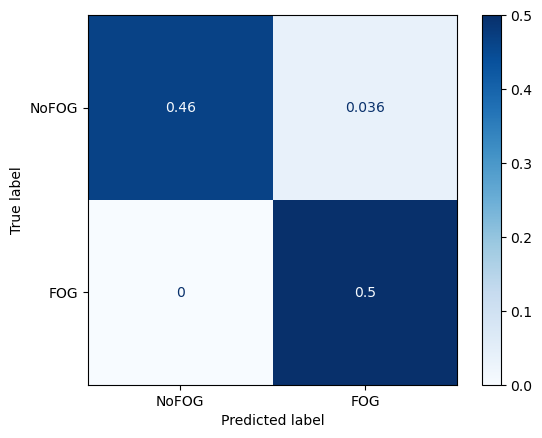

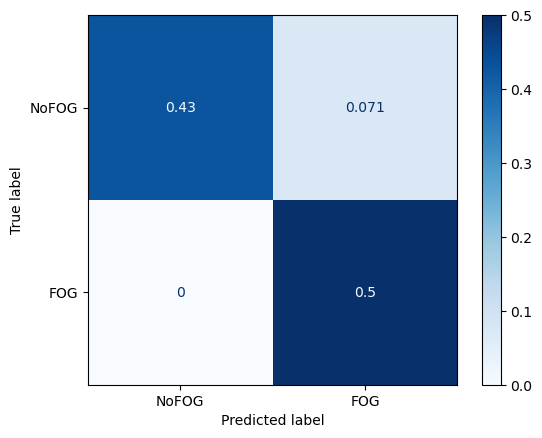

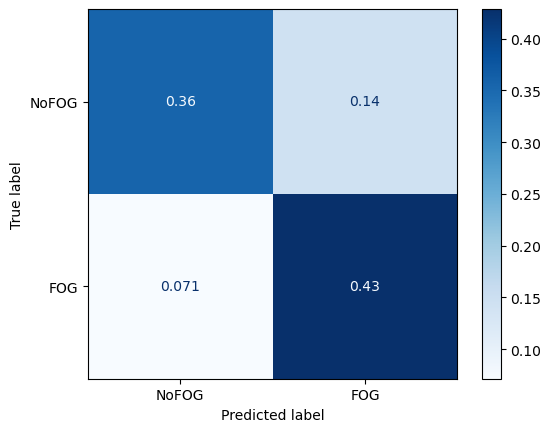

In [75]:
from sklearn.neighbors import KNeighborsClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
Xtest , ytest  = under.fit_resample(Xtest, ytest)
Xtrain, ytrain = under.fit_resample(Xtrain, ytrain)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print("KNN 3  = Accuracy:", accuracy_score(ytest, ypred))
disp = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['NoFOG','FOG'], cmap=plt.cm.Blues, normalize='all')

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print("KNN 5  = Accuracy:", accuracy_score(ytest, ypred))
disp = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['NoFOG','FOG'], cmap=plt.cm.Blues, normalize='all')

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print("KNN 10 = Accuracy:", accuracy_score(ytest, ypred))
disp = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['NoFOG','FOG'], cmap=plt.cm.Blues, normalize='all')

LOO for KNN

c:\Users\mathieu.yeche\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9692366122293962


c:\Users\mathieu.yeche\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


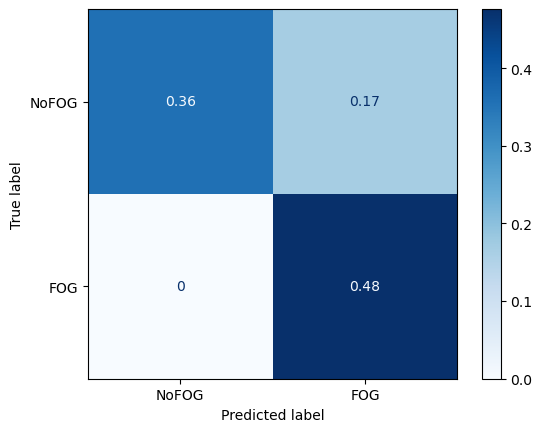

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 4, 5, 7, 10, 12, 15, 20], 
    'weights': ['uniform', 'distance'], # uniform = all points in each neighborhood are weighted equally, distance = points are weighted by the inverse of their distance
    'p': [1, 1.5, 2]  # 1 = manhattan, 2 = euclidean
}

# Create an instance of KNN classifier
knn = KNeighborsClassifier()

# Create an instance of LeaveOneOut cross-validation
loo = LeaveOneOut()

# Create an instance of GridSearchCV and fit the data
grid_search = GridSearchCV(knn, param_grid, cv=loo, n_jobs=-1)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)


Effect of scaling on KNN

KNN 5  = Accuracy: 0.8333333333333334
parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


c:\Users\mathieu.yeche\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mathieu.yeche\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

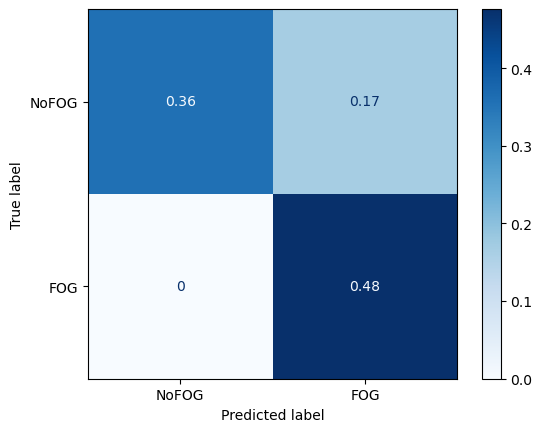

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.preprocessing import StandardScaler

XRS, yRS = RandomUnderSampler(sampling_strategy='majority').fit_resample(X, y)
XRS = StandardScaler().fit_transform(XRS)

Xtrain, Xtest, ytrain, ytest = train_test_split(XRS, yRS, test_size=0.2, random_state=1)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print("KNN 5  = Accuracy:", accuracy_score(ytest, ypred))
print("parameters:", clf.get_params())
confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['NoFOG','FOG'], cmap=plt.cm.Blues, normalize='all')

Multiclassifiers

In [126]:
if TYPE_OF_MODEL == "PCA":
    AxisToPlot = ['Dim.1', 'Combined23']
    XRS['Combined23'] = XRS['Dim.2'] + XRS['Dim.3']
elif TYPE_OF_MODEL == "AllVAR":
    AxisToPlot = ['Longueur_pas', 'Cadence']

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

XRS = XRS.reset_index(drop=True)
yRS = yRS.reset_index(drop=True)


datasets = [
    (XRS[AxisToPlot],yRS),
]


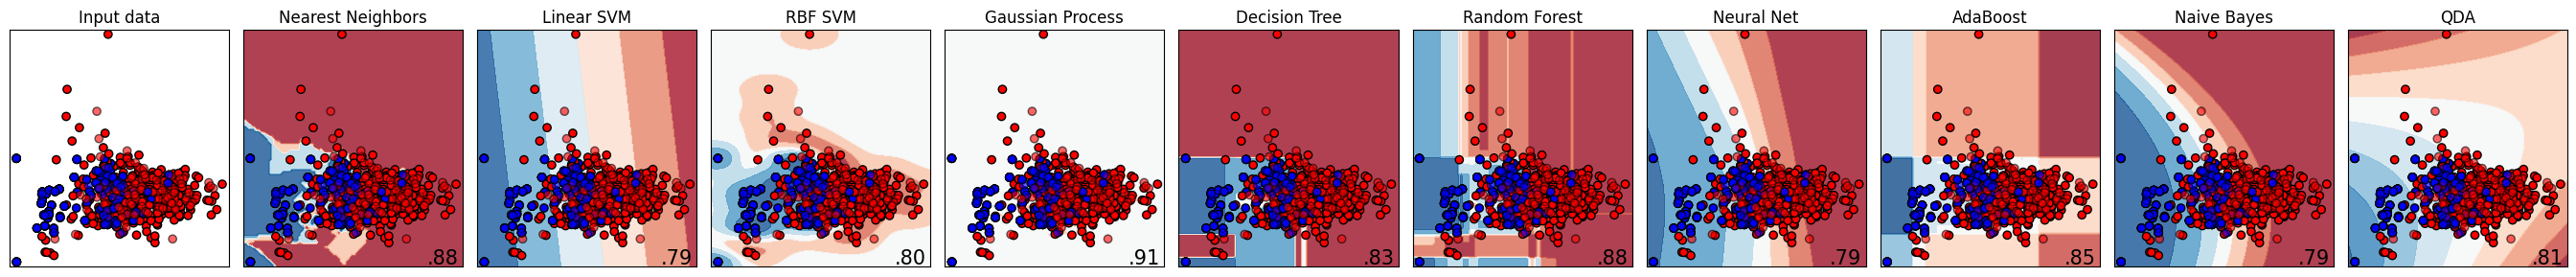

In [129]:
figure = plt.figure(figsize=(27, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    Xlocal, ylocal = ds
    
    Xlocal = np.array(Xlocal)
    ylocal = np.array(ylocal)
    
    X_train, X_test, y_train, y_test = train_test_split(
        Xlocal, ylocal, test_size=0.2, random_state=42
    )
    x_min, x_max = Xlocal[:, 0].min() - 0.5, Xlocal[:, 0].max() + 0.5
    y_min, y_max = Xlocal[:, 1].min() - 0.5, Xlocal[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, Xlocal, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

Refine Kernel of SVM

In [241]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
target_names  = ['NonFOG', 'FOG']


subset = XRS[AxisToPlot]

models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

from joblib import parallel_backend

with parallel_backend('threading', n_jobs=2):
    # Your scikit-learn code here
    models = (clf.fit(subset, yRS) for clf in models)



    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = XRS[AxisToPlot[0]], XRS[AxisToPlot[1]]

    for clf, title, ax in zip(models, titles, sub.flatten()):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            subset,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel=AxisToPlot[0],
            ylabel=AxisToPlot[1],
        )
        ax.scatter(X0, X1, c=yRS, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.show()

: 

## OLD


Classification tree

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

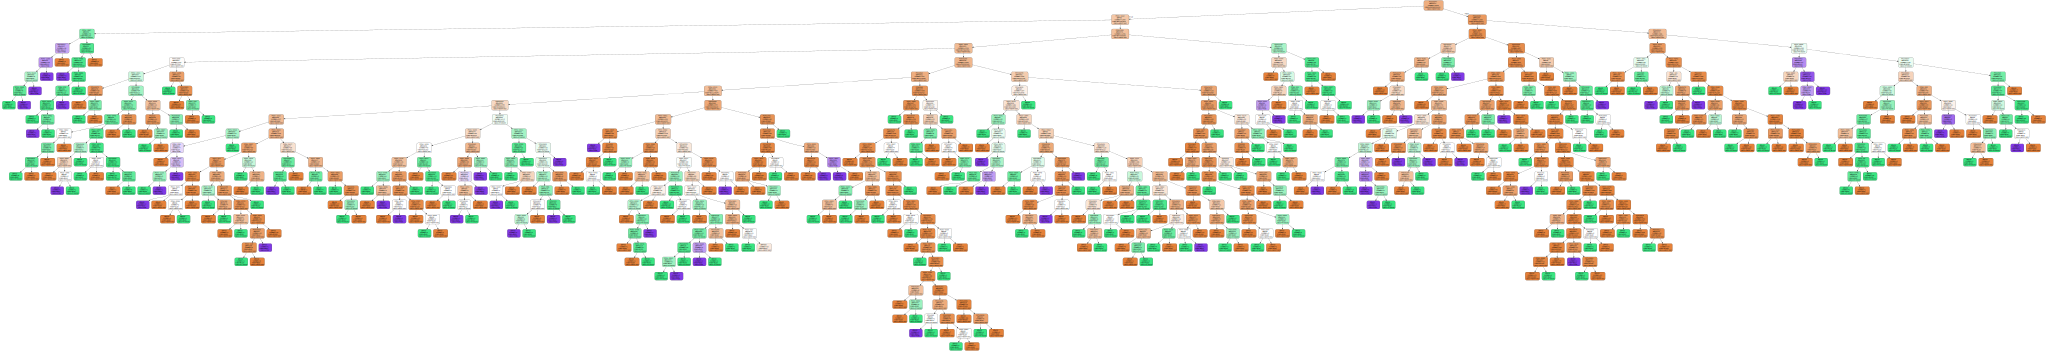

In [ ]:
feature_names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
target_names  = ['NonFreez','Freezer', 'FOG']

import graphviz 
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                      class_names=target_names,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Neural Network

In [ ]:
from sklearn.model_selection import train_test_split

X   = MY_APA.drop('FOG', axis = 1)
y   = MY_APA['FOG']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(Xtrain, ytrain)

c:\Users\mathieu.yeche\Anaconda3\envs\GTP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
ypred = clf.predict(Xtest)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.7685009487666035


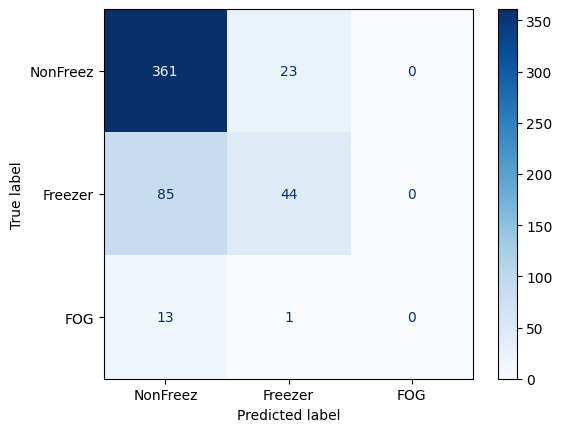

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(ytest, ypred)

disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=target_names,
        cmap=plt.cm.Blues,
        normalize=None,
    )

Same, only for fog 0/1

In [ ]:
MY_APA_red = 0
MY_APA_red = MY_APA.copy()
MY_APA_red.loc[MY_APA_red['FOG'].isin([1, 2]), 'FOG'] = 0
MY_APA_red.loc[MY_APA_red['FOG'].isin([3]),'FOG'] = 1
MY_APA_red.head()

X   = MY_APA_red.drop('FOG', axis = 1)
y   = MY_APA_red['FOG']

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

c:\Users\mathieu.yeche\Anaconda3\envs\GTP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:

print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.9582542694497154


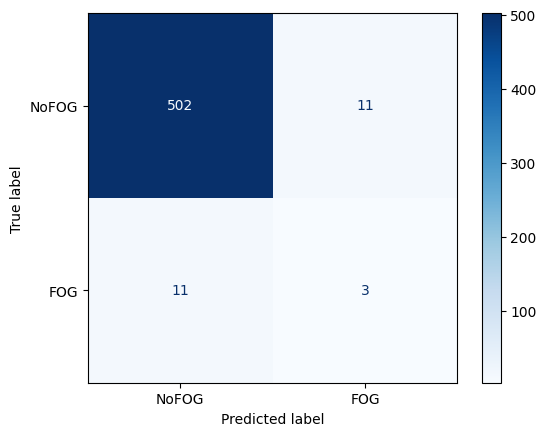

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

In [ ]:
print(sum(MY_APA['FOG'] == 1))

1909
